# I - Data Visualisation

In [1]:
# imports bib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

from sklearn import metrics

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [2]:
# exploration de data avec pandas
df_salaire = pd.read_csv("datasets/Salary_Data.csv")
df_assurance =  pd.read_csv("datasets/insurance.csv")

In [3]:
# afficher les trois premier lignes de dataset salaire
df_salaire.head(3)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


In [4]:
# afficher les trois premier lignes de dataset assurance
df_assurance.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [5]:
# rendre les colonnes region et smoker numerique
df_assurance['smoker'] = pd.get_dummies(df_assurance['smoker'] , drop_first=1)
df_assurance['sex'] = pd.get_dummies(df_assurance['sex'] , drop_first=1) 
df_assurance['region'] = df_assurance['region'].map({'southwest':0 , 'southeast': 1,'northwest':2,'northeast':3})

In [6]:
# afficher le resume statistique dataset/salaire 
df_salaire.describe()
# Count : nombre de samples
# mean : le moyenne 
# std  : écart-type il mesure la despersion des valeurs 
# min  : valeur minimum
# 25%  :le premier quartile (Q1)
# 50%  : le median
# 75%  : la troisieme quartile (Q3)
# max : valeur maximum 

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
# afficher le resume statistique dataset/assurance 
df_assurance.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


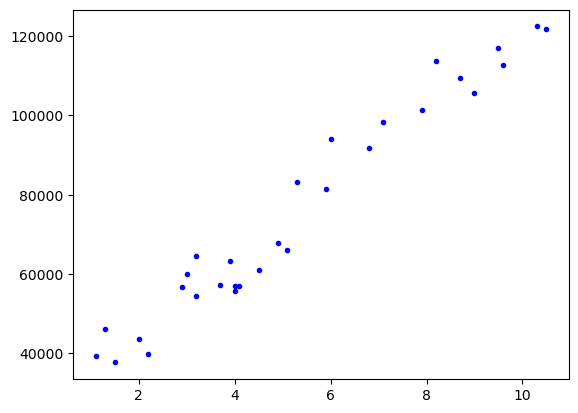

In [8]:
# la nuage des points du  data set « Expérience / Salaire » 
X =  df_salaire[['YearsExperience']]
Y = df_salaire[['Salary']]
plt.plot(X, Y, "b.",label='Expérience / Salaire')

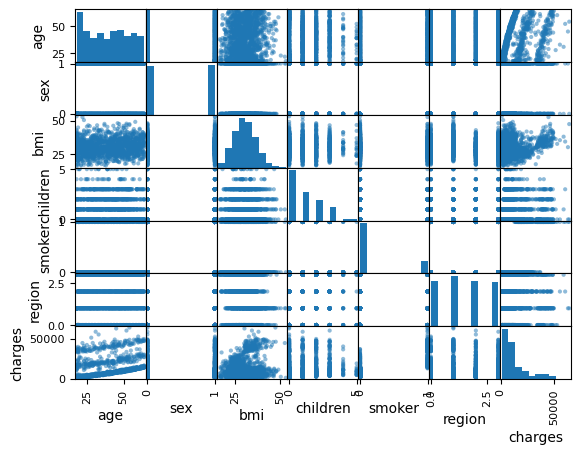

In [9]:
#  nuages des points du  data set assurance selon les propriétés « Features »
scatter_matrix(df_assurance)
plt.show()
# scatter_matrix : Elle affiche la relation entre chaque paire de variables numériques dans notre ensemble de donnees 

# II - Régression Simple cas Expérience Salaire

In [10]:
#  entraîner le modèle par algorithme de la régression linière
# deviser les donnees , 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

In [11]:
# Ajustement de module 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
print("la pente de la droite est  : ",regressor.coef_)
print("intercepterest  : ",regressor.intercept_)

la pente de la droite est  :  [[9312.57512673]]
intercepterest  :  [26780.09915063]


In [13]:
# prédire les données d’un data set de test
Y_predict = regressor.predict(X_test)
y_test = y_test.values
pred = pd.DataFrame({'Real':y_test.tolist(),'Predict':Y_predict.tolist()})
pred

,Real,Predict
0,[37731.0],[40748.96184072197]
1,[122391.0],[122699.62295593882]
2,[57081.0],[64961.65717021785]
3,[63218.0],[63099.142144872014]
4,[116969.0],[115249.56285455546]
5,[109431.0],[107799.50275317211]


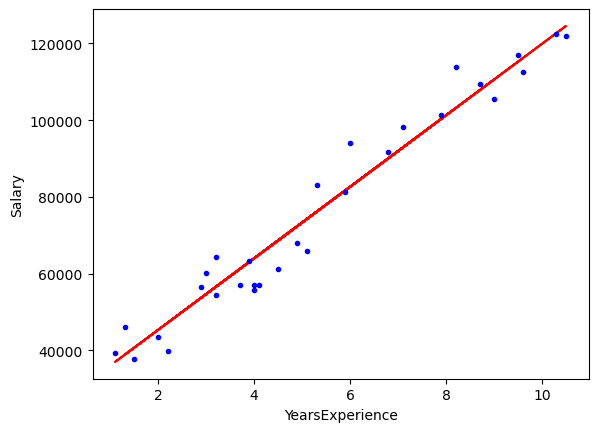

In [14]:
# Visualiser le résultat de la régression sous forme d’un graphe
X_predict = regressor.predict(X_train)
plt.plot(X_train, X_predict , color="r")
plt.plot(X, Y, "b.")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [15]:
#Évaluer le modèle en utilisant ces trois méthodes 
# calcule la valeur de l'erreur absolue moyenne
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_predict)) 
# calculer  l'erreur quadratique moyenne
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_predict)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_predict)))

Mean Absolute Error: 2446.1723690465064
Mean Squared Error: 12823412.298126562
Root Mean Squared Error: 3580.979237321345


# III -  Régression multiple cas d’assurance 


In [16]:
# entraîner le modèle par intermédiaire de algorithme de la régression linière
X_assurance = df_assurance.iloc[:, :-1].values
Y_assurance = df_assurance.iloc[:, 6].values
# deviser les donnes  avec 20% pour les donnes de Test
X_train_assu, X_test_assu, y_train_assu, y_test_assu = train_test_split(X_assurance, Y_assurance, test_size=0.2,random_state=0)

In [17]:
# Ajustement de module 
regressor_assurance = LinearRegression()
regressor_assurance.fit(X_train_assu, y_train_assu)

LinearRegression()

In [18]:
# la pente
print("intercept  : ",regressor_assurance.intercept_)
# les coefficients
columns = df_assurance.iloc[:, :-1].columns
pd.DataFrame(regressor_assurance.coef_,columns ,columns = ['cofficient'])

intercept  :  -12527.509626455549


,cofficient
age,253.991852
sex,-24.324551
bmi,328.402617
children,443.729295
smoker,23568.879484
region,288.508573


In [19]:
# prédire les données d’un data set de test
Y_predict_assu = regressor_assurance.predict(X_test_assu)
pred = pd.DataFrame({'Real':y_test_assu.tolist(),'Predict':Y_predict_assu.tolist()})
pred

,Real,Predict
0,9724.53000,11017.230479
1,8547.69130,9787.530168
2,45702.02235,37994.782118
3,12950.07120,16122.778407
4,9644.25250,6930.759230
...,...,...
263,15019.76005,14699.098767
264,6664.68595,8210.854549
265,20709.02034,16019.284542
266,40932.42950,33104.944084


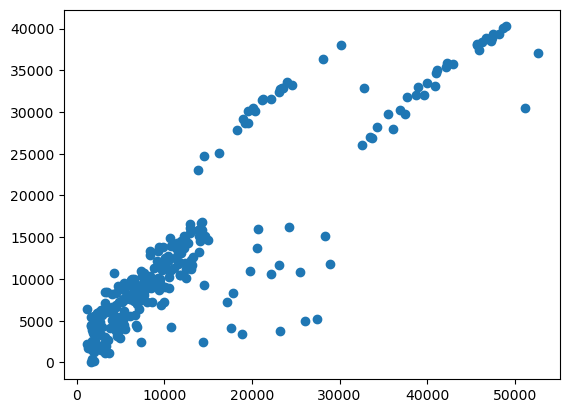

In [20]:
# Visualiser le résultat de la régression sous forme d’un graphe
# on affiche la prediction des donnees de test en fonction des vrais target , 
# on voit pas une droite , ou quelque chose proche d'une droite , donc c'est pas un bon regresseur
Y_predict_assu = regressor_assurance.predict(X_test_assu)
plt.scatter(y_test_assu ,Y_predict_assu )

In [21]:
# Évaluer le modèle en utilisant ces trois méthodes

In [22]:
# calcule la valeur de l'erreur absolue moyenne
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_assu, Y_predict_assu)) 
# calculer  l'erreur quadratique moyenne
print('Mean Squared Error:', metrics.mean_squared_error(y_test_assu, Y_predict_assu)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_assu, Y_predict_assu)))
# la valeur de MAE est eleve donc le model n'est pas precis

Mean Absolute Error: 3930.3332739011435
Mean Squared Error: 31845929.134159435
Root Mean Squared Error: 5643.219748880902


# IV - Régression linière polynomial multiple cas de china GDP

In [78]:
# exploration des donnees 

In [79]:
df_china_gdp = pd.read_csv("datasets/china_gdp.csv")
df_china_gdp.head(4)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10


In [80]:
# entraîner le modèle par intermédiaire de algorithme de la régression linière 

# 1- separer les features et sample
X_GDP = df_china_gdp[['Year']].values
Y_GDP = df_china_gdp[['Value']].values

In [81]:
# 2- deviser les donnees , 20% pour le test
X_train_GDP, X_test_GDP, Y_train_GDP, Y_test_GDP = train_test_split(X_GDP, Y_GDP, test_size=0.2,random_state=0)

In [82]:
# 3- Ajustement de module 
regressor_regLinaire = LinearRegression()
regressor_regLinaire.fit(X_train_GDP, Y_train_GDP)

LinearRegression()

In [90]:
# entraîner le modèle par intermédiaire de algorithm la régression linière polynomiale 

# 1- explorer la polynome
poly = PolynomialFeatures(degree=3, include_bias=True) 
# 2- transformer les données d'entraînement et de test en utilisant une fonction de transformation polynomiale 
X_GDP_trans = poly.fit_transform(X_GDP) 
X_train_GDP_trans = poly.fit_transform(X_train_GDP) 
X_test_GDP_trans = poly.transform(X_test_GDP)
# 3 - Ajustement de module 
regressor_polynomiale = LinearRegression()
regressor_polynomiale.fit(X_train_GDP_trans, Y_train_GDP)


LinearRegression()

In [91]:
# prédire les données d’un data set de test pour les deux modèles
# 1- regression linaire 
Y_test_GDP_pred_lin = regressor_regLinaire.predict(X_test_GDP)
Y_test_GDP_pred_lin

array([[ 3.94452574e+12],
       [ 2.39649151e+12],
       [ 3.29951148e+12],
       [ 1.49347154e+12],
       [-4.41571253e+11],
       [-1.60259693e+12],
       [ 2.26748865e+12],
       [ 3.68652003e+12],
       [ 4.07352859e+12],
       [ 2.00948295e+12],
       [-1.34459122e+12]])

In [92]:
# 2- regression linaire polinomiale
Y_test_GDP_pred_poli = regressor_polynomiale.predict(X_test_GDP_trans)
Y_test_GDP_pred_poli

array([[ 3.41513916e+12],
       [ 1.28340457e+11],
       [ 1.47533570e+12],
       [-1.21078854e+11],
       [ 4.74277613e+11],
       [-2.24446121e+11],
       [ 3.83812846e+10],
       [ 2.52536303e+12],
       [ 3.92178112e+12],
       [-8.07738765e+10],
       [ 8.18531069e+10]])

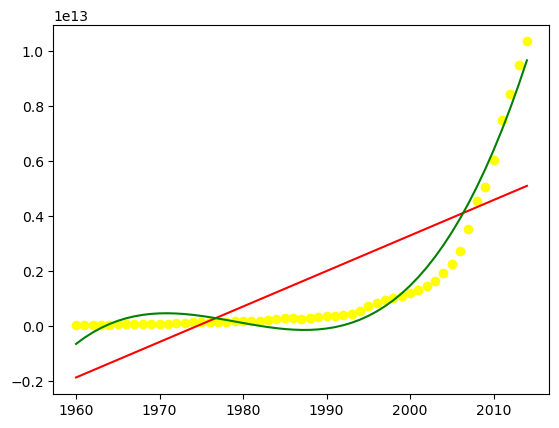

In [93]:
# Visualiser le résultat de la régression sous forme d’un graphe des deux modèles.
plt.scatter(X_GDP,Y_GDP , color='yellow')
plt.plot(X_GDP,regressor_regLinaire.predict(X_GDP),color='red')
plt.plot(X_GDP,regressor_polynomiale.predict(X_GDP_trans),color='green')

In [94]:
# 1 - Évaluer le model de regression linaire

# calcule la valeur de l'erreur absolue moyenne
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_GDP, Y_test_GDP_pred_lin)) 
# calculer  l'erreur quadratique moyenne
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_GDP, Y_test_GDP_pred_lin)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_GDP, Y_test_GDP_pred_lin)))

Mean Absolute Error: 1580448121034.8318
Mean Squared Error: 2.6811931196364024e+24
Root Mean Squared Error: 1637434920733.1577


In [96]:
# 2 - Évaluer le model de regression linaire polinomiale

# calcule la valeur de l'erreur absolue moyenne
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_GDP, Y_test_GDP_pred_poli)) 
# calculer  l'erreur quadratique moyenne
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_GDP, Y_test_GDP_pred_poli)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_GDP, Y_test_GDP_pred_poli)))

Mean Absolute Error: 519491190192.197
Mean Squared Error: 4.007242352290313e+23
Root Mean Squared Error: 633027831322.6294


In [ ]:
# intrepretation 
# L'erreur est  plus élevée dans un modèle de régression linaire par rapport  à un modèle de régression linéaire polynomial
# ce qui fait le modèle polynomial plus précis que le modèle linéaire pour résoudre le problème de prédiction linaire 
# lorsque le data set n'a pas une forme linaire .